In [1]:
# Importing basic Python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
# Reading dataset

df = pd.read_csv('D:/Study/DataScience/KMeansClustering/customerdata.csv')

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# Columns channel and Reagin are categorical
# Apply OHE to resolve those issues

# Import sklearn Label Encoder and One Hot Encoding 

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_df_0 = LabelEncoder()
df.iloc[:, 0] = labelencoder_df_0.fit_transform(df.iloc[:, 0])

labelencoder_df_1 = LabelEncoder()
df.iloc[:, 1] = labelencoder_df_1.fit_transform(df.iloc[:, 1])

onehotencoder = OneHotEncoder(categorical_features = "all")
X = onehotencoder.fit_transform(df).toarray()

# Perform Scaling

from sklearn.preprocessing import StandardScaler


mms = StandardScaler()
mms.fit(X)
data_transformed = mms.transform(X)

In [19]:
data_transformed

array([[-1.44865163,  1.44865163, -0.46056619, ..., -0.0477274 ,
        -0.0477274 , -0.0477274 ],
       [-1.44865163,  1.44865163, -0.46056619, ..., -0.0477274 ,
        -0.0477274 , -0.0477274 ],
       [-1.44865163,  1.44865163, -0.46056619, ..., -0.0477274 ,
        -0.0477274 , -0.0477274 ],
       ...,
       [-1.44865163,  1.44865163, -0.46056619, ..., -0.0477274 ,
        -0.0477274 , -0.0477274 ],
       [ 0.69029709, -0.69029709, -0.46056619, ..., -0.0477274 ,
        -0.0477274 , -0.0477274 ],
       [ 0.69029709, -0.69029709, -0.46056619, ..., -0.0477274 ,
        -0.0477274 , -0.0477274 ]])

In [22]:
# Importing dataset for k means clustering

from sklearn.cluster import KMeans

km2 = KMeans(n_clusters=2)

km2.fit(df)

print(km2.inertia_)

113217528878.79836


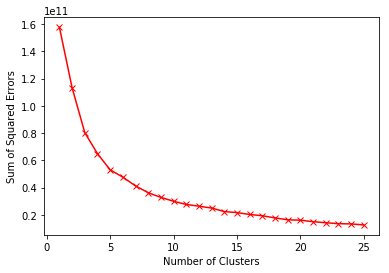

In [28]:
# Create a plot of Sum of Squares Errors ( Kmeans.Intertial value) againsts number of clusters
# to find optimalnumber of clusters


SSE = []

for i in range(1,26):
    km = KMeans(n_clusters=i)
    km.fit(df)
    SSE.append(km.inertia_)

    
x = range(1,26)
plt.plot(x,SSE, 'rx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')
plt.show()
